In [65]:
from functions import eol_symbols, make_feature_target_token_class, align_labels_with_tokens, label2id, id2label

In [94]:
from torchinfo import summary

In [2]:
eol_symbols

['.', ',', '?', '!', '(', ')', ';', ':', '-', '%', '"', '/', "'"]

In [3]:
'-' in eol_symbols + ['-', '%']

True

In [16]:
import nltk

words = nltk.word_tokenize('ez "A magyarul tudó horvát klasszikus".')

In [17]:
words

['ez', '``', 'A', 'magyarul', 'tudó', 'horvát', 'klasszikus', "''", '.']

In [47]:
res = make_feature_target_token_class(['Menjünk el a Lacihoz a fűnyírójáért!'])

  0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
print(res[0])
print(res[1])

['menjünk', 'el', 'a', 'lacihoz', 'a', 'fűnyírójáért']
[8, 0, 0, 8, 0, 3]


In [49]:
from transformers import AutoTokenizer

In [61]:
tokenizer = AutoTokenizer.from_pretrained('D:/00_DATA/02_ELTE/MODELS/hupunct-v02f-01/checkpoint-248000', model_max_len=5)

In [62]:
subwords = tokenizer(res[0], is_split_into_words=True, truncation=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [63]:
subwords

{'input_ids': [2, 23421, 2052, 2005, 11774, 2148, 2278, 2005, 5931, 27688, 4333, 31756, 5008, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [58]:
print(subwords.tokens())

['[CLS]', 'menjünk', 'el', 'a', '[SEP]']


In [54]:
print(subwords.word_ids())

[None, 0, 1, 2, 3, 3, 3, 4, 5, 5, 5, 5, 5, None]


In [56]:
align_labels_with_tokens([8, 0, 0, 8, 0, 3], subwords.word_ids())

[-100, 8, 0, 0, 8, 8, 8, 0, 3, 3, 3, 3, 3, -100]

In [2]:
import speech_recognition as sr

In [3]:
r = sr.Recognizer()

In [10]:
text = r.recognize_google('C:/KBData/01_PROJECT/00_GIT/ELTE/ELTE_AI/final_project/05_thesis_docs/qs8za-6frr6.wav')

AssertionError: ``audio_data`` must be audio data

C:\KBApps\conda\envs\torch2\Lib\site-packages\pydub\utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [4]:
if None:
    print('y')
else:
    print('n')

n


In [20]:
import pickle as pkl
import numpy as np

In [13]:
with open('../data/dataset_v2/stats/art_lens.pkl', 'rb') as f:
    art_lens = pkl.load(f)

In [21]:
al = np.array(art_lens)

In [25]:
al_filt = al[al<2000]

In [26]:
len(al_filt)

3347672

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

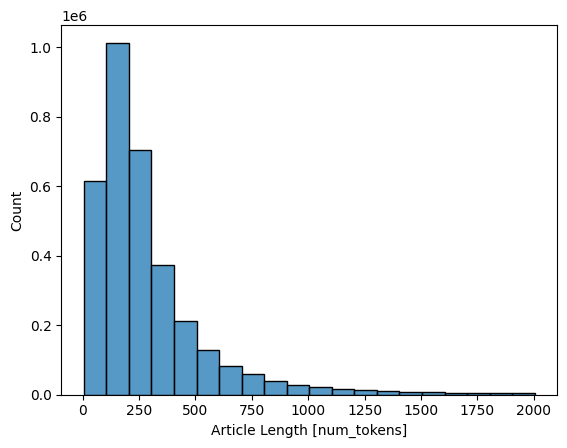

In [33]:
sns.histplot(data=al_filt, binwidth=100)
plt.xlabel("Article Length [num_tokens]")
plt.ylabel("Count")
plt.savefig('../05_thesis_docs/article_len_distro.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
names = ['train', 'eval', 'test']
with open('../data/dataset_v2/stats/art_lens.pkl', 'rb') as f:
    art_lens = pkl.load(f)

In [64]:
from transformers import AutoModelForTokenClassification

In [66]:
model = AutoModelForTokenClassification.from_pretrained(
    "../02_dependencies/hubert-base-cc",
    id2label=id2label,
    label2id=label2id,
)

Some weights of the model checkpoint at ../02_dependencies/hubert-base-cc were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not init

In [82]:
print(model)

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32001, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [97]:
import torch

summary(model)

Layer (type:depth-idx)                                  Param #
BertForTokenClassification                              --
├─BertModel: 1-1                                        --
│    └─BertEmbeddings: 2-1                              --
│    │    └─Embedding: 3-1                              24,576,768
│    │    └─Embedding: 3-2                              393,216
│    │    └─Embedding: 3-3                              1,536
│    │    └─LayerNorm: 3-4                              1,536
│    │    └─Dropout: 3-5                                --
│    └─BertEncoder: 2-2                                 --
│    │    └─ModuleList: 3-6                             85,054,464
├─Dropout: 1-2                                          --
├─Linear: 1-3                                           12,304
Total params: 110,039,824
Trainable params: 110,039,824
Non-trainable params: 0